In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
from torch import nn

In [7]:
'''torch vision is a seperate lib to import datasets'''
import torch
from torchvision import datasets, transforms

# Define the transform to normalize the data

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,)),])

# Defining the training set
training_set = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)

# Loading the training dataset
trainloader = torch.utils.data.DataLoader(dataset=training_set, batch_size=128, shuffle=True)


In [8]:
#iterating through the data
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([128, 1, 28, 28])
torch.Size([128])


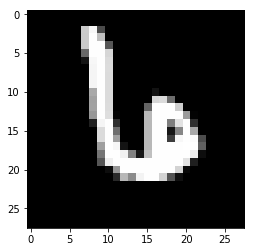

In [10]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [14]:
def actiavtion(x):
    return 1/(1+torch.exp(-x))

#Flatten the 28*28 vector into an array
inputs = images.view(images.shape[0], -1) #image.shape[0] -> grabbing the batch size

# -1 is the shortcut to return a propriate shape (784)

#creating the first layer 
w1 = torch.randn((28*28), 256) #taking an input vector of 784 and giving out 256 as output
b1  = torch.randn(256) # Bias = Weights.

#Hidden Layer
w2 = torch.randn(256, 10) #input = 256 output = 10
b2 = torch.randn(10)

hidden = actiavtion(torch.mm(inputs, w1) + b1)
out = torch.mm(hidden, w2) + b2


In [18]:
print ('The batch size is {} \nThe output classes are {}.'.format(out.shape[0], out.shape[1]))

The batch size is 128 
The output classes are 10.


In [19]:
print(out)

tensor([[ -3.7033,  -7.1423,   1.1361,  ..., -12.5997,  23.6793,  18.2029],
        [ -7.5332,  -4.0216,   8.6732,  ...,  -7.8377,  19.5081,  18.6722],
        [-10.6751, -16.1437,   6.8596,  ...,  -3.6522,  24.5867,  14.9924],
        ...,
        [-11.2019,  -5.9565,  -1.6531,  ..., -15.2115,  19.4655,  10.4977],
        [  0.1072, -10.8206,  -0.9306,  ..., -21.7228,  20.7826,  29.0985],
        [  0.6833,  -7.9291,   0.4142,  ..., -12.9205,  28.0373,  15.2794]])


In [ ]:
#Defining a Neural Network to apply a Sigmoid function to get the probability
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        #Input
        self.hidden = nn.Linear(786, 256)
        
        #output
        self.output = nn.Linear(256, 10)
        
        #Sigmoid
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(din = 1)
        
    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x